In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_iowait = pd.read_csv("cpu_iowait.csv")
df_cpu_irq = pd.read_csv("cpu_irq.csv")
df_system_msec = pd.read_csv("cpu_system_msec.csv")
df_user_msec = pd.read_csv("cpu_user_msec.csv")
df_cpu_util = pd.read_csv("cpu_util_per.csv")

df_baseline_iowait = pd.read_csv("../../baseline/cpu related/cpu_iowait.csv")
df_baseline_irq = pd.read_csv("../../baseline/cpu related/cpu_irq.csv")
df_baseline_system_msec = pd.read_csv("../../baseline/cpu related/cpu_system_msec.csv")
df_baseline_user_msec = pd.read_csv("../../baseline/cpu related/cpu_user_msec.csv")
df_baseline_util_per = pd.read_csv("../../baseline/cpu related/cpu_util_per.csv")

df_iowait["source"] = "NETLOSS"
df_cpu_irq["source"] = "NETLOSS"
df_system_msec["source"] = "NETLOSS"
df_user_msec["source"] = "NETLOSS"
df_cpu_util["source"] = "NETLOSS"

df_baseline_iowait["source"] = "BASELINE"
df_baseline_irq["source"] = "BASELINE"
df_baseline_system_msec["source"] = "BASELINE"
df_baseline_user_msec["source"] = "BASELINE"
df_baseline_util_per["source"] = "BASELINE"


df_iowait["Time"] = pd.to_datetime(df_iowait["Time"])
df_cpu_irq["Time"] = pd.to_datetime(df_cpu_irq["Time"])
df_system_msec["Time"] = pd.to_datetime(df_system_msec["Time"])
df_user_msec["Time"] = pd.to_datetime(df_user_msec["Time"])
df_cpu_util["Time"] = pd.to_datetime(df_cpu_util["Time"])

df_baseline_iowait["Time"] = pd.to_datetime(df_baseline_iowait["Time"])
df_baseline_irq["Time"] = pd.to_datetime(df_baseline_irq["Time"])
df_baseline_system_msec["Time"] = pd.to_datetime(df_baseline_system_msec["Time"])
df_baseline_user_msec["Time"] = pd.to_datetime(df_baseline_user_msec["Time"])
df_baseline_util_per["Time"] = pd.to_datetime(df_baseline_util_per["Time"])


delay = 1800
duration = 3000

## cpu io wait

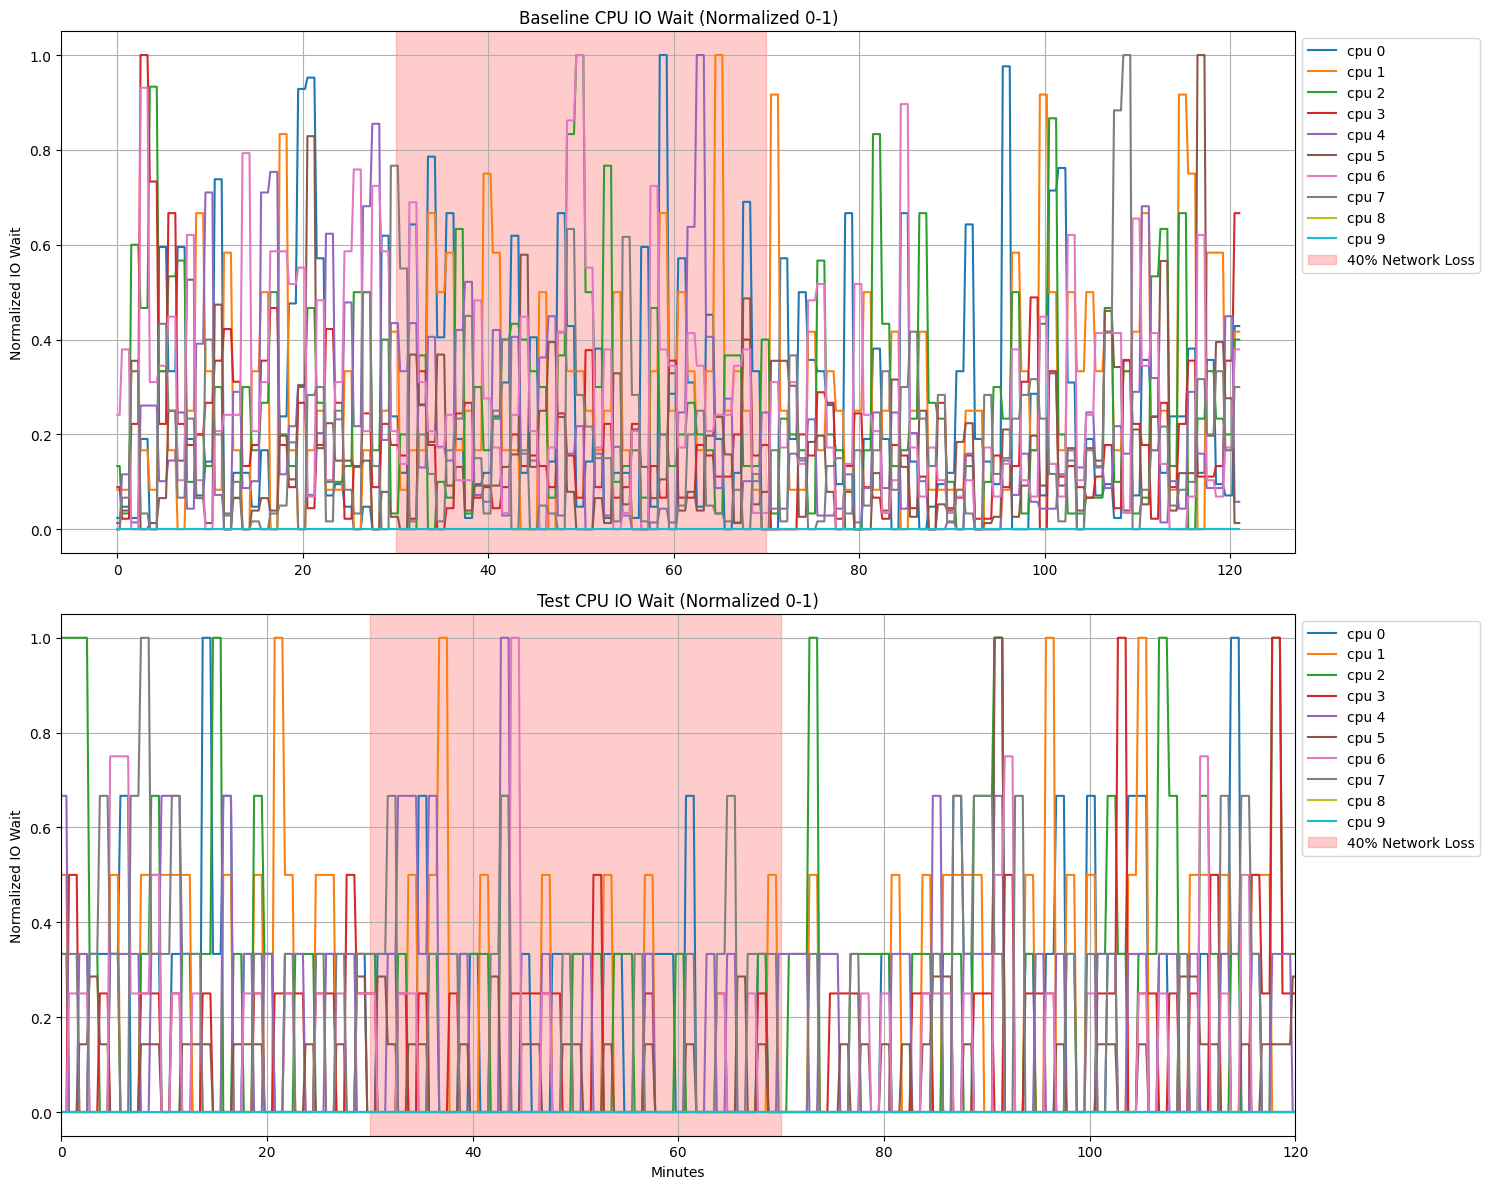

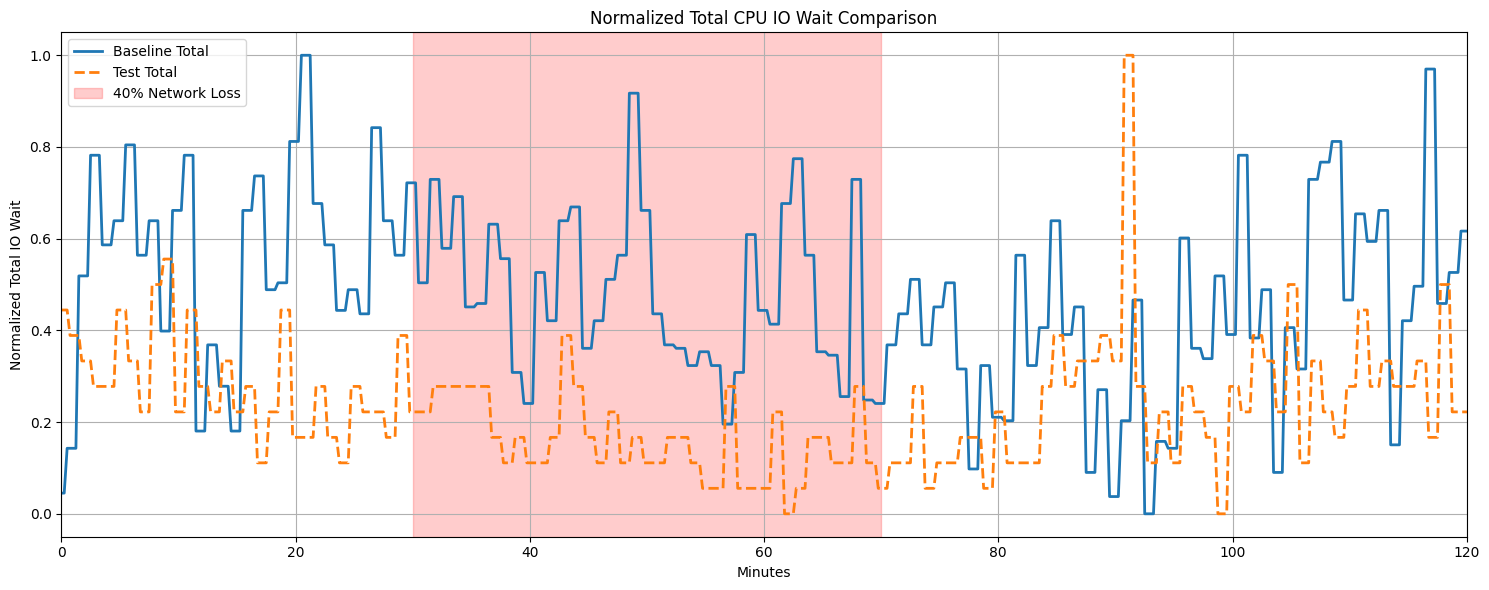

=== Statistics for Normalized Data ===

Baseline - Average normalized IO wait by core during chaos injection:
cpu 0: 0.295
cpu 1: 0.299
cpu 2: 0.280
cpu 3: 0.149
cpu 4: 0.219
cpu 5: 0.158
cpu 6: 0.288
cpu 7: 0.164
cpu 8: 0.000
cpu 9: 0.000

Test - Average normalized IO wait by core during chaos injection:
cpu 0: 0.133
cpu 1: 0.112
cpu 2: 0.122
cpu 3: 0.085
cpu 4: 0.145
cpu 5: 0.064
cpu 6: 0.061
cpu 7: 0.155
cpu 8: 0.000
cpu 9: 0.000

Normalized total IO wait comparison:
Baseline - Before chaos: 0.560
Test - Before chaos: 0.289
Baseline - During chaos: 0.484
Test - During chaos: 0.162


In [2]:

# Convert Time to datetime
df_baseline_iowait['Time'] = pd.to_datetime(df_baseline_iowait['Time'])
df_iowait['Time'] = pd.to_datetime(df_iowait['Time'])

df_baseline_iowait['Time'] = pd.to_datetime(df_baseline_iowait['Time'])
df_iowait['Time'] = pd.to_datetime(df_iowait['Time'])

# Calculate time offset to align datasets
offset = df_baseline_iowait["Time"].min() - df_iowait["Time"].min()
df_iowait["Time"] = df_iowait["Time"] + offset

# Calculate minutes since start for each dataset
df_iowait["Minutes"] = (df_iowait["Time"] - df_iowait["Time"].min()).dt.total_seconds() / 60
df_baseline_iowait["Minutes"] = (df_baseline_iowait["Time"] - df_baseline_iowait["Time"].min()).dt.total_seconds() / 60

# Get list of CPU columns
cpu_cols = [col for col in df_baseline_iowait.columns if col.startswith('cpu')]

# Define chaos injection parameters
delay = 30  # 30 minutes from start
duration = 40  # duration of the injection

# Create a function to normalize the data between 0 and 1
def normalize_df(df, columns):
    df_norm = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  # Avoid division by zero
            df_norm[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            df_norm[col] = 0
    return df_norm

# Normalize the data
df_baseline_norm = normalize_df(df_baseline_iowait, cpu_cols)
df_iowait_norm = normalize_df(df_iowait, cpu_cols)

# Create normalized comparison plots
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
for col in cpu_cols:
    plt.plot(df_baseline_norm["Minutes"], df_baseline_norm[col], label=col)
plt.title("Baseline CPU IO Wait (Normalized 0-1)")
plt.ylabel("Normalized IO Wait")
plt.grid(True)
plt.axvspan(delay, delay + duration, color='red', alpha=0.2, label="40% Network Loss")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.subplot(2, 1, 2)
for col in cpu_cols:
    plt.plot(df_iowait_norm["Minutes"], df_iowait_norm[col], label=col)
plt.title("Test CPU IO Wait (Normalized 0-1)")
plt.xlabel("Minutes")
plt.ylabel("Normalized IO Wait")
plt.grid(True)
plt.axvspan(delay, delay + duration, color='red', alpha=0.2, label="40% Network Loss")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlim(0, 120)
plt.tight_layout()
plt.show()

# Calculate total IO wait and normalize it as well
df_baseline_iowait['Total_iowait'] = df_baseline_iowait.iloc[:, 1:11].sum(axis=1)
df_iowait['Total_iowait'] = df_iowait.iloc[:, 1:11].sum(axis=1)

# Normalize total IO wait
df_baseline_norm['Total_iowait'] = (df_baseline_iowait['Total_iowait'] - df_baseline_iowait['Total_iowait'].min()) / (df_baseline_iowait['Total_iowait'].max() - df_baseline_iowait['Total_iowait'].min())
df_iowait_norm['Total_iowait'] = (df_iowait['Total_iowait'] - df_iowait['Total_iowait'].min()) / (df_iowait['Total_iowait'].max() - df_iowait['Total_iowait'].min())

# Create a comparison of normalized total IO wait
plt.figure(figsize=(15, 6))
plt.plot(df_baseline_norm["Minutes"], df_baseline_norm['Total_iowait'], label="Baseline Total", linewidth=2)
plt.plot(df_iowait_norm["Minutes"], df_iowait_norm['Total_iowait'], label="Test Total", linewidth=2, linestyle='--')
plt.title("Normalized Total CPU IO Wait Comparison")
plt.xlabel("Minutes")
plt.ylabel("Normalized Total IO Wait")
plt.grid(True)
plt.axvspan(delay, delay + duration, color='red', alpha=0.2, label="40% Network Loss")
plt.legend()
plt.xlim(0, 120)
plt.tight_layout()
plt.show()

# Print some statistics about the normalized data
print("=== Statistics for Normalized Data ===")
print("\nBaseline - Average normalized IO wait by core during chaos injection:")
for col in cpu_cols:
    chaos_period = (df_baseline_norm["Minutes"] >= delay) & (df_baseline_norm["Minutes"] <= delay + duration)
    avg_value = df_baseline_norm.loc[chaos_period, col].mean()
    print(f"{col}: {avg_value:.3f}")

print("\nTest - Average normalized IO wait by core during chaos injection:")
for col in cpu_cols:
    chaos_period = (df_iowait_norm["Minutes"] >= delay) & (df_iowait_norm["Minutes"] <= delay + duration)
    avg_value = df_iowait_norm.loc[chaos_period, col].mean()
    print(f"{col}: {avg_value:.3f}")

# Calculate average normalized values before and during chaos injection
pre_chaos_baseline = df_baseline_norm[df_baseline_norm["Minutes"] < delay]['Total_iowait'].mean()
pre_chaos_test = df_iowait_norm[df_iowait_norm["Minutes"] < delay]['Total_iowait'].mean()
during_chaos_baseline = df_baseline_norm[(df_baseline_norm["Minutes"] >= delay) & (df_baseline_norm["Minutes"] <= delay + duration)]['Total_iowait'].mean()
during_chaos_test = df_iowait_norm[(df_iowait_norm["Minutes"] >= delay) & (df_iowait_norm["Minutes"] <= delay + duration)]['Total_iowait'].mean()

print("\nNormalized total IO wait comparison:")
print(f"Baseline - Before chaos: {pre_chaos_baseline:.3f}")
print(f"Test - Before chaos: {pre_chaos_test:.3f}")
print(f"Baseline - During chaos: {during_chaos_baseline:.3f}")
print(f"Test - During chaos: {during_chaos_test:.3f}")

In [3]:
combined = pd.concat([df1, df2])

plt.figure(figsize=(4, 3))
sns.boxplot(x="source", y="disk sda", data=combined)
plt.title("Box Plot comparison'disk sda'")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df1' is not defined

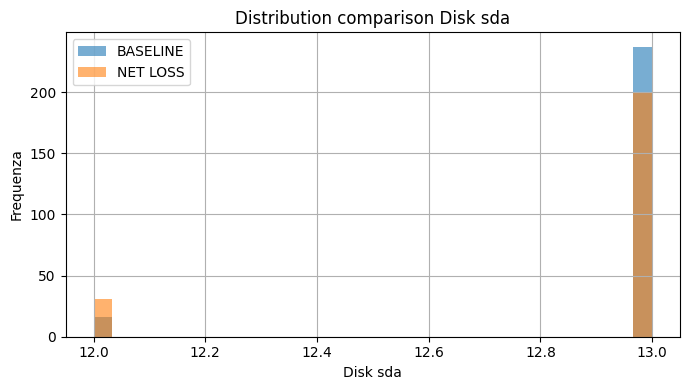

In [ ]:
plt.figure(figsize=(7, 4))
plt.hist(df1["disk sda"], bins=30, alpha=0.6, label="BASELINE")
plt.hist(df2["disk sda"], bins=30, alpha=0.6, label="NET LOSS")
plt.xlabel("Disk sda")
plt.ylabel("Frequenza")
plt.title("Distribution comparison Disk sda")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


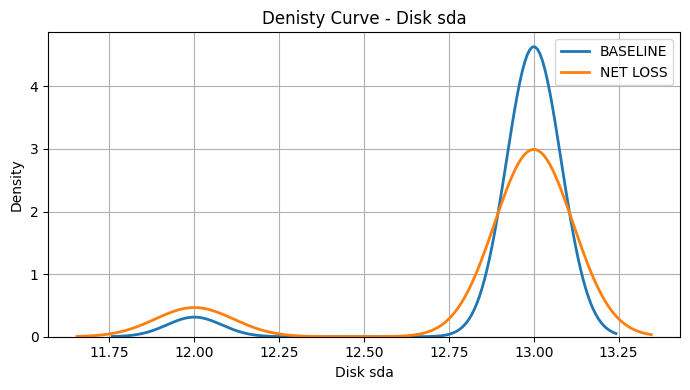

In [ ]:
plt.figure(figsize=(7, 4))
sns.kdeplot(df1["disk sda"], label="BASELINE", linewidth=2)
sns.kdeplot(df2["disk sda"], label="NET LOSS", linewidth=2)
plt.title("Denisty Curve - Disk sda")
plt.xlabel("Disk sda")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
